In [38]:
# 구글 드라이브 불러오기

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Performance Python

### Loops

#### Python

In [ ]:
import random

In [ ]:
def average_py(n):
    s = 0
    for i in range(n):
        s += random.random()
    return s / n

In [ ]:
n = 10000000

In [ ]:
%time average_py(n)

CPU times: user 954 ms, sys: 0 ns, total: 954 ms
Wall time: 956 ms


0.5001863366736842

In [ ]:
%timeit average_py(n)

1 loop, best of 3: 918 ms per loop


#### NumPy

In [ ]:
import numpy as np

In [ ]:
def average_np(n):
    s = np.random.random(n)
    return s.mean()

In [ ]:
%time average_np(n)

CPU times: user 94.5 ms, sys: 24.4 ms, total: 119 ms
Wall time: 120 ms


0.4998462540856964

In [ ]:
%timeit average_np(n)

10 loops, best of 3: 92 ms per loop


In [ ]:
s = np.random.random(n)
s.nbytes

80000000

#### Numba

In [ ]:
import numba

In [ ]:
average_nb = numba.jit(average_py)

In [ ]:
%time average_nb(n)

CPU times: user 319 ms, sys: 123 ms, total: 443 ms
Wall time: 374 ms


0.5000888555992958

In [ ]:
%time average_nb(n)

CPU times: user 64.2 ms, sys: 0 ns, total: 64.2 ms
Wall time: 64.1 ms


0.4998172247736942

In [ ]:
%timeit average_nb(n)

10 loops, best of 3: 59.4 ms per loop


#### Cython

C에 관한 지식이 필요하므로 생략

### Algorithms

#### Prime Numbers

##### Python

In [39]:
def is_prime(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [40]:
n = int(1e8 + 3)
n

100000003

In [41]:
%time is_prime(n)

CPU times: user 34 µs, sys: 0 ns, total: 34 µs
Wall time: 36.5 µs


False

In [42]:
p1 = int(1e8 + 7)
p1

100000007

In [43]:
%time is_prime(p1)

CPU times: user 348 µs, sys: 16 µs, total: 364 µs
Wall time: 366 µs


True

In [44]:
p2 = 100109100129162907
p2.bit_length()

57

In [45]:
%time is_prime(p2)

CPU times: user 17.7 s, sys: 4.77 ms, total: 17.7 s
Wall time: 17.8 s


True

##### Numba

In [46]:
is_prime_nb = numba.jit(is_prime)

In [47]:
%time is_prime_nb(n)

CPU times: user 104 ms, sys: 5.04 ms, total: 109 ms
Wall time: 110 ms


False

In [48]:
%time is_prime_nb(n)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 11.9 µs


False

##### Multiprocessing

In [49]:
import multiprocessing as mp

In [50]:
pool = mp.Pool(processes=4)

In [51]:
%time pool.map(is_prime, 10 * [p1])

CPU times: user 0 ns, sys: 1.49 ms, total: 1.49 ms
Wall time: 8.9 ms


[True, True, True, True, True, True, True, True, True, True]

In [52]:
%time pool.map(is_prime_nb, 10 * [p2])

CPU times: user 16.3 ms, sys: 3.85 ms, total: 20.1 ms
Wall time: 15.3 s


[True, True, True, True, True, True, True, True, True, True]

#### Fibonacci Numbers

##### Recursive algorithm

In [54]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [55]:
%time fib_rec_py1(35)

CPU times: user 3.2 s, sys: 2.79 ms, total: 3.21 s
Wall time: 3.22 s


9227465

In [58]:
fib_rec_nb = numba.jit(fib_rec_py1)

In [59]:
%time fib_rec_nb(35)

<ipython-input-54-43f5a0fde52c>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fib_rec_py1" failed type inference due to: Untyped global name 'fib_rec_py1': cannot determine Numba type of <class 'function'>

File "<ipython-input-54-43f5a0fde52c>", line 5:
def fib_rec_py1(n):
    <source elided>
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)
        ^

  def fib_rec_py1(n):
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "fib_rec_py1" was compiled in object mode without forceobj=True.

File "<ipython-input-54-43f5a0fde52c>", line 1:
def fib_rec_py1(n):
^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/lates

CPU times: user 3.29 s, sys: 5.77 ms, total: 3.3 s
Wall time: 3.31 s


9227465

In [60]:
from functools import lru_cache as cache

In [61]:
@cache(maxsize=None)
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [62]:
%time fib_rec_py2(35)

CPU times: user 45 µs, sys: 1 µs, total: 46 µs
Wall time: 50.3 µs


9227465

In [63]:
%time fib_rec_py2(80)

CPU times: user 39 µs, sys: 0 ns, total: 39 µs
Wall time: 42 µs


23416728348467685

In [64]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [65]:
%time fib_it_py(80)

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 14.1 µs


23416728348467685

In [66]:
fib_it_nb = numba.jit(fib_it_py)

In [67]:
%time fib_it_nb(80)

CPU times: user 74.3 ms, sys: 1.96 ms, total: 76.3 ms
Wall time: 81.2 ms


23416728348467685

In [68]:
%time fib_it_nb(80)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 10.5 µs


23416728348467685

In [69]:
%%time
fn = fib_rec_py2(150)
print(fn)

9969216677189303386214405760200
CPU times: user 123 µs, sys: 3 µs, total: 126 µs
Wall time: 131 µs


In [70]:
fn.bit_length()

103

In [71]:
%%time
fn = fib_it_nb(150)
print(fn)

6792540214324356296
CPU times: user 466 µs, sys: 0 ns, total: 466 µs
Wall time: 474 µs


In [72]:
fn.bit_length()

63

#### The Number Pi

In [74]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [75]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1)
for _ in range(500)]

In [76]:
rn = np.array(rn)
rn[:5]

array([[ 0.97216686, -0.02947168],
       [-0.29195344, -0.68381547],
       [ 0.69536505,  0.86416136],
       [-0.51479274,  0.41672402],
       [-0.26899912, -0.00652647]])

(-1.1, 1.1)

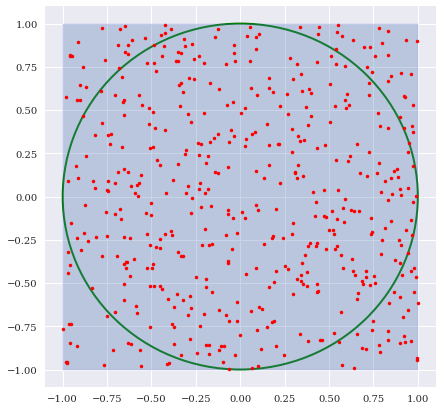

In [77]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0, 
                  facecolor='None')
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:, 0], rn[:, 1], 'r.')
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)

In [78]:
n = int(1e7)

In [79]:
%time rn = np.random.random((n, 2)) * 2 - 1

CPU times: user 199 ms, sys: 45.2 ms, total: 245 ms
Wall time: 246 ms


In [80]:
rn.nbytes

160000000

In [81]:
%time distance = np.sqrt((rn ** 2).sum(axis=1))
distance[:8].round(3)

CPU times: user 230 ms, sys: 69.2 ms, total: 300 ms
Wall time: 302 ms


array([1.161, 0.992, 0.413, 0.619, 0.827, 0.75 , 1.019, 1.045])

In [82]:
%time frac = (distance <= 1.0).sum() / len(distance)

CPU times: user 24.2 ms, sys: 0 ns, total: 24.2 ms
Wall time: 27.4 ms


In [83]:
pi_mcs = frac * 4
pi_mcs

3.1420484

In [84]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [85]:
%time mcs_pi_py(n)

CPU times: user 4.42 s, sys: 2.56 ms, total: 4.43 s
Wall time: 4.43 s


3.1415732

In [86]:
mcs_pi_nb = numba.jit(mcs_pi_py)

In [87]:
%time mcs_pi_nb(n)

CPU times: user 433 ms, sys: 29 ms, total: 462 ms
Wall time: 467 ms


3.1413352

In [88]:
%time mcs_pi_nb(n)

CPU times: user 165 ms, sys: 988 µs, total: 166 ms
Wall time: 169 ms


3.1424408

### Binomial Trees

#### Python

In [89]:
import math

In [90]:
S0 = 36.
T = 1.0
r = 0.06
sigma = 0.2

In [91]:
def simulate_tree(M):
    dt = T / M
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    S = np.zeros((M + 1, M + 1))
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return S

In [92]:
np.set_printoptions(formatter={'float':
                               lambda x: '%6.2f' % x})

In [93]:
simulate_tree(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [94]:
%time simulate_tree(500)

CPU times: user 128 ms, sys: 0 ns, total: 128 ms
Wall time: 129 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

#### NumPy

In [95]:
M = 4

In [96]:
up = np.arange(M + 1)
up = np.resize(up, (M + 1, M + 1))
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [97]:
down = up.T * 2
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [98]:
up - down

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [99]:
dt = T / M

In [100]:
S0 * np.exp(sigma * math.sqrt(dt) * (up - down))

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [101]:
def simulate_tree_np(M):
    dt = T / M
    up = np.arange(M + 1)
    up = np.resize(up, (M + 1, M + 1))
    down = up.transpose() * 2
    S = S0 * np.exp(sigma * math.sqrt(dt) * (up - down))
    return S

In [102]:
simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [103]:
%time simulate_tree_np(500)

CPU times: user 6.79 ms, sys: 3.88 ms, total: 10.7 ms
Wall time: 17.1 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]])

#### Numba

In [104]:
simulate_tree_nb = numba.jit(simulate_tree)

In [105]:
simulate_tree_nb(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [106]:
%time simulate_tree_nb(500)

CPU times: user 803 µs, sys: 0 ns, total: 803 µs
Wall time: 822 µs


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

In [107]:
%timeit simulate_tree_nb(500)

1000 loops, best of 3: 398 µs per loop


### Monte Carlo Simulation

#### Python

In [108]:
M = 100
I = 50000

In [109]:
def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):
        for i in range(I):
            S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt +
                                           sigma * math.sqrt(dt) * rn[t, i])
    return S

In [110]:
%time S = mcs_simulation_py((M, I))

CPU times: user 6.48 s, sys: 9.3 ms, total: 6.49 s
Wall time: 6.51 s


In [111]:
S[-1].mean()

38.20131362388069

In [112]:
S0 * math.exp(r * T)

38.22611567563295

In [113]:
K = 40.

In [114]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()

In [115]:
C0

3.8628261788720244

#### NumPy

In [116]:
def mcs_simulation_np(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt +
                               sigma * math.sqrt(dt) * rn[t])
    return S

In [117]:
%time S = mcs_simulation_np((M, I))

CPU times: user 339 ms, sys: 870 µs, total: 340 ms
Wall time: 343 ms


In [118]:
S[-1].mean()

38.23098390693603

In [119]:
%timeit S = mcs_simulation_np((M, I))

1 loop, best of 3: 328 ms per loop


#### Numba

In [120]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

In [121]:
%time S = mcs_simulation_nb((M, I))

CPU times: user 633 ms, sys: 3.97 ms, total: 637 ms
Wall time: 641 ms


In [122]:
%time S = mcs_simulation_nb((M, I))

CPU times: user 324 ms, sys: 1.92 ms, total: 326 ms
Wall time: 326 ms


In [123]:
S[-1].mean()

38.22415014991913

In [124]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()
C0

3.843921137399106

In [125]:
%timeit S = mcs_simulation_nb((M, I))

1 loop, best of 3: 305 ms per loop


#### Multiprocessing

In [126]:
import multiprocessing as mp

In [127]:
pool = mp.Pool(processes=4)

In [128]:
p = 20

In [129]:
%timeit S = np.hstack(pool.map(mcs_simulation_np, p * [(M, int(I / p))]))

1 loop, best of 3: 326 ms per loop


In [130]:
%timeit S = np.hstack(pool.map(mcs_simulation_nb, p * [(M, int(I / p))]))

1 loop, best of 3: 312 ms per loop


### Recursive pandas Algorithm

#### Python

In [132]:
import pandas as pd

In [133]:
sym = 'SPY'

In [135]:
data = pd.DataFrame(pd.read_csv('/content/drive/My Drive/Python_for_Finance/data/tr_eikon_eod_data.csv', 
                                index_col=0, parse_dates=True)[sym]).dropna()

In [136]:
alpha = 0.25

In [138]:
data['EWMA'] = data[sym]

In [139]:
%%time
for t in zip(data.index, data.index[1:]):
    data.loc[t[1], 'EWMA'] = (alpha * data.loc[t[1], sym] +
                              (1 - alpha) * data.loc[t[0], 'EWMA'])

CPU times: user 629 ms, sys: 19.5 ms, total: 648 ms
Wall time: 615 ms


In [140]:
data.head()

,SPY,EWMA
Date,,
2010-01-04,113.33,113.330000
2010-01-05,113.63,113.405000
2010-01-06,113.71,113.481250
2010-01-07,114.19,113.658438
2010-01-08,114.57,113.886328


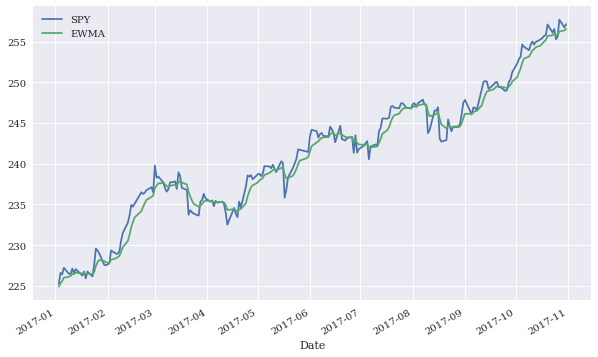

In [141]:
data[data.index > '2017-1-1'].plot(figsize=(10, 6));

In [142]:
def ewma_py(x, alpha):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1-alpha) * y[i-1]
    return y

In [143]:
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)

CPU times: user 9.08 ms, sys: 0 ns, total: 9.08 ms
Wall time: 8.79 ms


In [144]:
%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)

CPU times: user 2.17 ms, sys: 5 µs, total: 2.17 ms
Wall time: 2.03 ms


#### Numba

In [145]:
ewma_nb = numba.jit(ewma_py)

In [146]:
%time data['EWMA_NB'] = ewma_nb(data[sym], alpha)

<ipython-input-142-34b9530cd905>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "ewma_py" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at <ipython-input-142-34b9530cd905> (2)

File "<ipython-input-142-34b9530cd905>", line 2:
def ewma_py(x, alpha):
    y = np.zeros_like(x)
    ^

  def ewma_py(x, alpha):
<ipython-input-142-34b9530cd905>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "ewma_py" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "<ipython-input-142-34b9530cd905>", line 4:
def ewma_py(x, alpha):
    <source elided>
    y[0] = x[0]
    for i in range(1, len(x)):
    ^

  def ewma_py(x, alpha):
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "ewma_py" was compiled in object mode without forceobj=True, but has lifted loops.

CPU times: user 379 ms, sys: 7.94 ms, total: 387 ms
Wall time: 392 ms


/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "ewma_py" was compiled in object mode without forceobj=True.

File "<ipython-input-142-34b9530cd905>", line 4:
def ewma_py(x, alpha):
    <source elided>
    y[0] = x[0]
    for i in range(1, len(x)):
    ^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "<ipython-input-142-34b9530cd905>", line 4:
def ewma_py(x, alpha):
    <source elided>
    y[0] = x[0]
    for i in range(1, len(x)):
    ^

  state.func_ir.loc))


In [147]:
%timeit data['EWMA_NB'] = ewma_nb(data[sym], alpha)

100 loops, best of 3: 6.27 ms per loop


In [148]:
%time data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)

CPU times: user 246 ms, sys: 29.2 ms, total: 275 ms
Wall time: 280 ms


In [149]:
%timeit data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)

The slowest run took 6.14 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 112 µs per loop
